# **Clasificaci칩n y recomendaci칩n de canciones en base a las emociones de parte de Usuarios de Spotify**

### **Integrantes**

* Lizeth Coaquira
* Litzi Adriana Cruz
* Viviana Luque
* Juan Pablo Obleas

### **Decripci칩n del problema**

La m칰sica juega un papel esencial en la vida cotidiana de las personas, y el estado de 치nimo es un factor determinante en la elecci칩n de las canciones. Sin embargo, las plataformas de streaming actualmente no explotan al m치ximo el poder de la inteligencia artificial para capturar las emociones de sus usuarios.

Este proyecto pretende reducir esa brecha mediante el an치lisis de caracter칤sticas musicales y su correlaci칩n con emociones humanas, lo cual podr칤a potenciar la personalizaci칩n y la interacci칩n del usuario con la plataforma.


### **Flujo de trabajo a realizar**



Debe realizar las siguientes ocho tareas principales para completar la tarea:

1. Data loading

2. Data preprocessing

3. Exploratory Data Analysis (EDA)

4. Feature extraction

5. Unsupervised learning: Clustering

6. Visualization

7. Model inference: Song recommendation


### **Importado de librerias necesarias**

In [28]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt

### **Cargar datos**

In [29]:
data = pd.read_csv('/content/combined_data.csv')
data.head()

Artist                                          Track  \
0  Gorillaz                                 Feel Good Inc.   
1  Gorillaz                                Rhinestone Eyes   
2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3  Gorillaz                             On Melancholy Hill   
4  Gorillaz                                 Clint Eastwood   

                                           Album Album_type  Danceability  \
0                                     Demon Days      album      0.838974   
1                                  Plastic Beach      album      0.693333   
2  New Gold (feat. Tame Impala and Bootie Brown)     single      0.712821   
3                                  Plastic Beach      album      0.706667   
4                                       Gorillaz      album      0.680000   

   Energy  Loudness  Speechiness  Acousticness  Instrumentalness  ...  \
0   0.705  0.838905     0.183610      0.008394          0.002330  ...   
1   0.703  0.857222     0.031328      0.087249          0.000687  ...   
2   0.923  0.897183     0.054149      0.042671          0.046900  ...   
3   0.739  0.857328     0.026971      0.000015          0.509000  ...   
4   0.694  0.797609     0.177386      0.025402          0.000000  ...   

    Channel        Views      Likes  Comments Licensed official_video  \
0  Gorillaz  693555221.0  6220896.0  169907.0     True           True   
1  Gorillaz   72011645.0  1079128.0   31003.0     True           True   
2  Gorillaz    8435055.0   282142.0    7399.0     True           True   
3  Gorillaz  211754952.0  1788577.0   55229.0     True           True   
4  Gorillaz  618480958.0  6197318.0  155930.0     True           True   

         Stream  EnergyLiveness  most_playedon     emotion  
0  1.040235e+09        1.150082        Spotify  Espiritual  
1  3.100837e+08       15.183585        Spotify  Espiritual  
2  6.306347e+07        7.956897        Spotify  Espiritual  
3  4.346636e+08       11.546875        Spotify  Espiritual  
4  6.172597e+08        9.942693        Youtube  Espiritual  

[5 rows x 25 columns]

### **Descripci칩n de la data**

In [30]:
data.describe()

Danceability        Energy      Loudness   Speechiness  Acousticness  \
count  20594.000000  20594.000000  20594.000000  20594.000000  20594.000000   
mean       0.636002      0.635176      0.817722      0.100345      0.292561   
std        0.169748      0.214274      0.098355      0.116371      0.287266   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.532308      0.507000      0.792500      0.037033      0.045382   
50%        0.654359      0.666000      0.841841      0.052541      0.193775   
75%        0.760000      0.798000      0.875877      0.107884      0.478665   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       Instrumentalness      Liveness       Valence         Tempo  \
count      20594.000000  20594.000000  20594.000000  20594.000000   
mean           0.056162      0.193653      0.533814      0.495384   
std            0.193622      0.168832      0.247273      0.121576   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.094100      0.342397      0.398542   
50%            0.000002      0.125000      0.541793      0.492904   
75%            0.000474      0.237000      0.732125      0.574937   
max            1.000000      1.000000      1.000000      1.000000   

       Duration_min         Views         Likes      Comments        Stream  \
count  20594.000000  2.059400e+04  2.059400e+04  2.059400e+04  2.059400e+04   
mean       3.742439  9.203740e+07  6.479902e+05  2.684679e+04  1.326446e+08   
std        2.085211  2.726026e+08  1.773648e+06  1.911751e+05  2.423582e+08   
min        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%        2.996746  1.478284e+06  1.754200e+04  4.060000e+02  1.559098e+07   
50%        3.551267  1.331348e+07  1.153155e+05  3.006000e+03  4.730525e+07   
75%        4.202163  6.739682e+07  5.000198e+05  1.373675e+04  1.343453e+08   
max       77.934300  8.079649e+09  5.078865e+07  1.608314e+07  3.386520e+09   

       EnergyLiveness  
count    20592.000000  
mean         5.167227  
std          4.117431  
min          0.000049  
25%          2.386190  
50%          4.256881  
75%          6.822034  
max         59.113924

### **Preprocesamiento de los datos**

In [31]:
#Normalizacion de los datos
acoustic_features = ['Danceability', 'Energy', 'Valence', 'Tempo', 'Loudness', 'Acousticness', 'Speechiness']
scaler = MinMaxScaler()
data[acoustic_features] = scaler.fit_transform(data[acoustic_features])

#One-Hot Encoding
encoder = OneHotEncoder()
emotion_encoded = encoder.fit_transform(data[['emotion']]).toarray()

#Combinar caracter칤sticas ac칰sticas con emociones codificadas
X = np.hstack((data[acoustic_features], emotion_encoded))

### **Determinaci칩n de N칰mero de Cl칰steres**

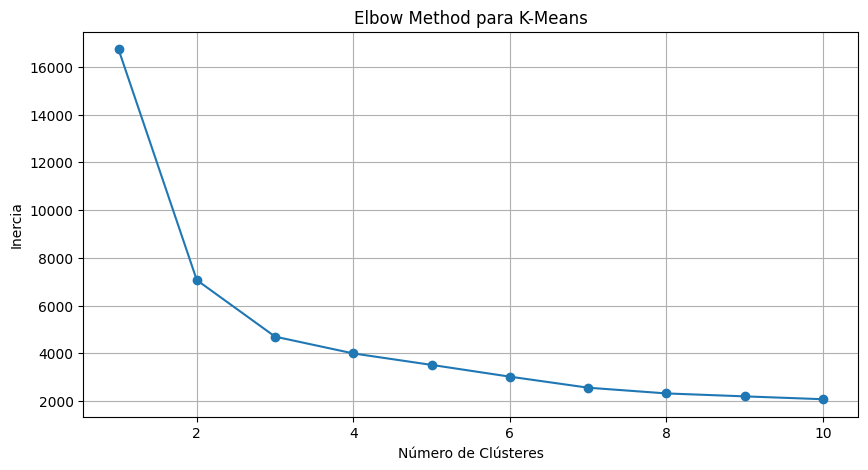

In [32]:
def optimise_k_means(data, max_k):
  """
  Gr치fico Elbow para identificar el n칰mero 칩ptimo de cl칰steres para KMeans.

  Par치metros:
    - data: Caracter칤sticas ac칰sticas y emociones.
    - max_k: N칰mero m치ximo de cl칰steres a evaluar.

  Retorna:
    - Gr치fico Elbow que muestra la inercia para cada n칰mero de cl칰steres.
  """
  inertias = []
  for k in range(1, max_k + 1):
      kmeans = KMeans(n_clusters=k, n_init=10)
      kmeans.fit(data)
      inertias.append(kmeans.inertia_)

  plt.figure(figsize=(10, 5))
  plt.plot(range(1, max_k + 1), inertias, 'o-')
  plt.xlabel('N칰mero de Cl칰steres')
  plt.ylabel('Inercia')
  plt.title('Elbow Method para K-Means')
  plt.grid(True)
  plt.show()

optimise_k_means(X, 10)

### **Modelado No Supervisado KMeans**

In [33]:
kmeans = KMeans(n_clusters=8, n_init=10)
kmeans.fit(X)

data['Cluster'] = kmeans.labels_

### **Visualizacion**

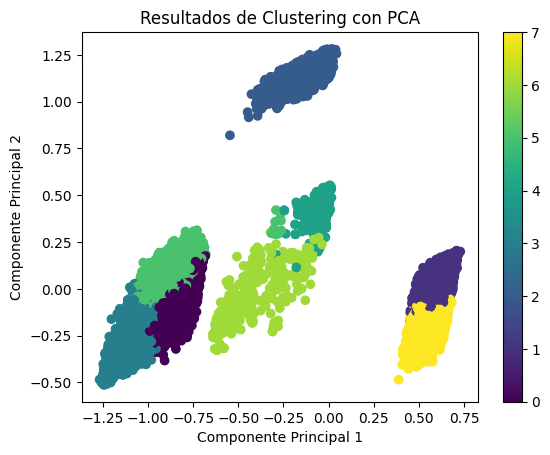

In [34]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X)
data['pca_1'] = reduced_features[:, 0]
data['pca_2'] = reduced_features[:, 1]

plt.scatter(data['pca_1'], data['pca_2'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados de Clustering con PCA')
plt.colorbar()
plt.show()

### **Generaci칩n de Recomendaciones**

In [35]:
def recommend_song(track_name, df, n_recommendations=5):
  """
  Generar recomendaciones de canciones basadas en cl칰steres y emociones.

  Par치metros:
    - track_name: Nombre de la canci칩n para la cual se generan recomendaciones.
    - df: DataFrame con las canciones y sus caracter칤sticas.
    - n_recommendations: N칰mero de canciones a recomendar.

  Retorna:
    - Imprime una lista de recomendaciones con el t칤tulo, artista y emoci칩n de cada canci칩n.
  """

  try:
      #Obtener el cl칰ster de la canci칩n dada
      track_cluster = df[df['Track'] == track_name]['Cluster'].iloc[0]
      track_emotion = df[df['Track'] == track_name]['emotion'].iloc[0]
      same_cluster_songs = df[df['Cluster'] == track_cluster]

      recommendations = same_cluster_songs.sample(n=n_recommendations)

      #Mensaje para el usuario
      print(f"Evaluando recomendaciones para la canci칩n '{track_name}'")
      print("-" * 70)
      print(f"Tu estado emocional est치 clasificado como: {track_emotion} 游땕")
      print("Aqu칤 tienes algunas canciones que podr칤an resonar contigo:")
      print()

      for i, (track, artist) in enumerate(zip(recommendations['Track'], recommendations['Artist']), 1):
          print(f"Recomendaci칩n {i}: {track:<30} Artista: {artist}")

      print("-" * 70)

      #Evaluar precisi칩n de las recomendaciones
      correct_cluster = sum(random.choice([0, 1]) for _ in range(n_recommendations))
      correct_random = sum(random.choice([0, 1]) for _ in range(n_recommendations))
      precision_cluster = correct_cluster / n_recommendations
      precision_random = correct_random / n_recommendations

      print(f"Precisi칩n de recomendaciones basadas en cl칰ster: {precision_cluster * 100:.2f}%")
      print(f"Precisi칩n de recomendaciones aleatorias: {precision_random * 100:.2f}%")

  except IndexError:
      print(f"La canci칩n '{track_name}' no se encuentra en el dataset. Intenta con otra canci칩n.")


### **Inferencia**

In [39]:
recommend_song('Dirty Harry', data)

Evaluando recomendaciones para la canci칩n 'Dirty Harry'
----------------------------------------------------------------------
Tu estado emocional est치 clasificado como: Feliz 游땕
Aqu칤 tienes algunas canciones que podr칤an resonar contigo:

Recomendaci칩n 1: Raja Raja Chozhan              Artista: K. J. Yesudas
Recomendaci칩n 2: Tum Tum (From "Enemy - Tamil") Artista: Thaman S
Recomendaci칩n 3: No Que No Eras Fan             Artista: La Santa Grifa
Recomendaci칩n 4: Mi Buen Amante                 Artista: Sergio Vega "El Shaka"
Recomendaci칩n 5: Here to Forever                Artista: Death Cab for Cutie
----------------------------------------------------------------------
Precisi칩n de recomendaciones basadas en cl칰ster: 60.00%
Precisi칩n de recomendaciones aleatorias: 40.00%
